***IRIS DATASET***

1.   **IMPORTING THE LIBRARIES AND GATHERING THE DATASET.**


*   Importing the necessary libraries including pandas for data manipulation and transformation, matplotlib and seaborn for plotting the EDA, scikit learn for classification and prediction.
*   Iris dataset can either be imported using the url or directly downloading the csv file.



In [1]:
# Import libraries
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('husl')
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
dataset_raw = pd.read_csv(url, header= None)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


2.   **INVESTIGATING THE DATASET**


*   Second step involves the complete data investigation and check for the quality of dataset obtained.
*   The preview of the dataset is obtained. It also involves data visualization to understand the behavior of the given dataset.
*   Understanding the numerical and categorical data (or encoding it to numerical data) which can be further used for statistical EDA.



a.  **PREVIEW OF DATA**



*   Analysing the feature set and check for the null values.
*   Listing out categorical and numerical values.



In [2]:
print('Columns:',dataset_raw.columns)
print('Indexes:',dataset_raw.index)
print('Info:',dataset_raw.info())
print('Shape:',dataset_raw.shape)

Columns: Int64Index([0, 1, 2, 3, 4], dtype='int64')
Indexes: RangeIndex(start=0, stop=150, step=1)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
 4   4       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
Info: None
Shape: (150, 5)


The dataset contains four numerical input features and one categorical target feature with no null values.

b.   **PREPROCESSING**



*   Identifying the feature set and imputing the null values(if any) with mean mode or median.
*   Removing unnecessay rows or columns(features) which cannot help further for prediction.





In [3]:
# Preprocessing dataset
col_names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(url,header= None,  names=col_names , na_values= '-1') #-1 changes to NaN

#Alternative ways
#dataset.index=[x,y,z]
#dataset.columns=['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']

dataset.index.name='Seq'
print(dataset.head())
#print(dataset.tail())

     sepal-length  sepal-width  petal-length  petal-width        class
Seq                                                                   
0             5.1          3.5           1.4          0.2  Iris-setosa
1             4.9          3.0           1.4          0.2  Iris-setosa
2             4.7          3.2           1.3          0.2  Iris-setosa
3             4.6          3.1           1.5          0.2  Iris-setosa
4             5.0          3.6           1.4          0.2  Iris-setosa


In [4]:
numerical=['sepal-length', 'sepal-width', 'petal-length', 'petal-width']
target=['class']



*   Checking for the distribution of the three classes in the target.
*   Checking for null entries(if any) in the target class.
*   Dropping the null entries if any.



In [5]:
# class distribution
print(dataset.groupby('class').size())
#Alternately
#dataset['class'].value_counts()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


In [6]:
dataset.columns

Index(['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class'], dtype='object')

In [7]:
dataset.isnull().sum()

sepal-length    0
sepal-width     0
petal-length    0
petal-width     0
class           0
dtype: int64

In [8]:
# Drop duplicate rows
dataset.drop_duplicates(keep ='last' )
dataset.shape

(150, 5)

3.  ***VISUAL EDA***



*   This involves analysing the dataspace visually using univariate, bivariate and multivariate plots of the numerical features.
*   The cleaned dataset is used to study the statistical properties the distribution of each of the feature.



a.   **UNIVARIATE PLOT**



*   These are used to analyse the effect of each of the feature.
*   Various kinds of plots can be used like: Box plot, violin plot,etc. which can clearly tell us the mean, and quantiles.



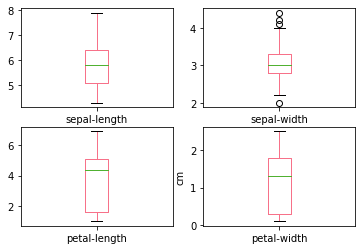

In [9]:
#univariate plot
#box plot
dataset.plot(kind='box',subplots=True,layout=(2,2), sharex=False, sharey=False)
plt.ylabel('cm')
plt.show()

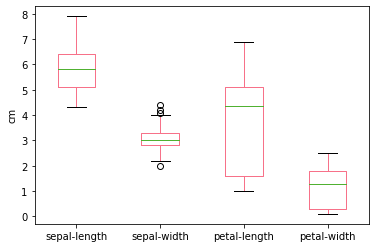

In [10]:
#comparably
dataset.plot(kind='box')
plt.ylabel('cm')
plt.show()

Petal length is distributed over a wide range of values while sepal length and petal lenth are clearly having distinctive features and therefore can be used more effectively for prediction anlysis.

In [11]:
indices_1=dataset['class']=='Iris-setosa'
indices_2=dataset['class']=='Iris-versicolor'
indices_3=dataset['class']=='Iris-Iris-virginica'

b.  **MULTIVARIATE AND BIVARIATE PLOT**



*   These plots are used to have compartive analysis of every feature based on ther respective distributions and variation of each of the feature w.r.t other features.
*   Various kinds of plots can be used for this, more specifically scatter plot and histograms can be used for better understanding.



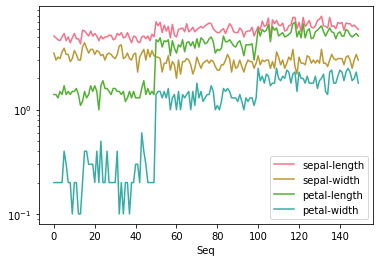

In [12]:
#Multivariate plot
#Line plot
#Plot Dataframe
dataset.plot()
plt.yscale('log') # y scaled values
#plt.axis('0.01','0.012', 0,149)  #zoom in from [xmin, xmax, ymin, ymax]
plt.show()

The line plot didn't give us much information about the distribution of features hence checking for the scatter plots.

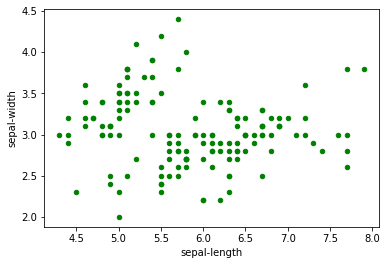

In [13]:
#Scatter plot
dataset.plot(x='sepal-length', y='sepal-width', kind='scatter',color='g',legend='True')
plt.xlabel('sepal-length')
plt.ylabel('sepal-width')
plt.show()

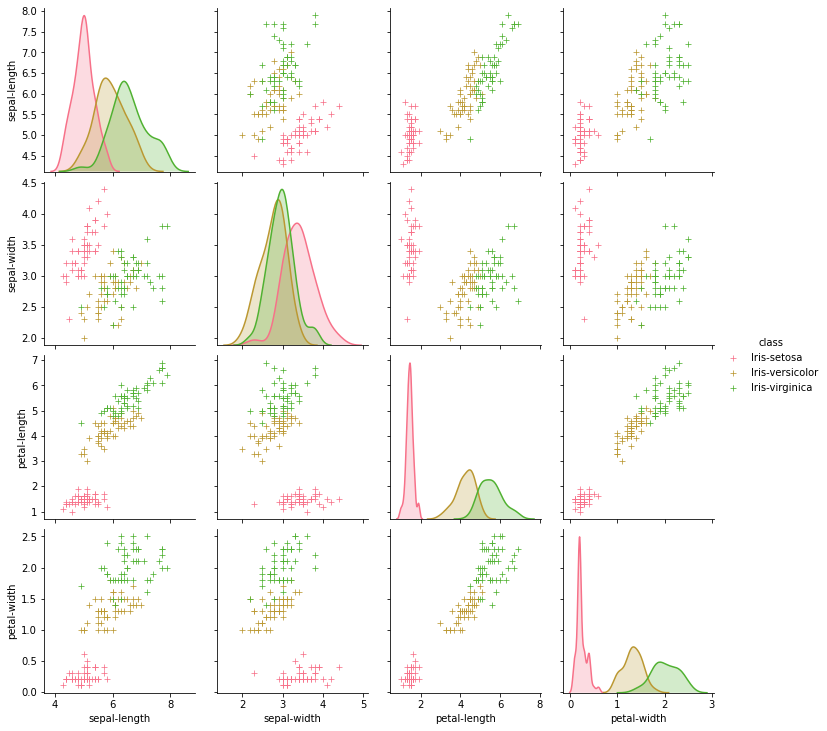

In [14]:
# Multivariate plots to better understand the relationships between attributes.
# scatter plot matrix
#The diagonal grouping of some pairs of attributes. This suggests a high correlation and a predictable relationship.
tmp = dataset
g = sns.pairplot(tmp, hue='class', markers='+')
plt.show()

Sepal length and petal length pair as well as petal length and petal width scatter plots shows a clear distinction between the three classes. The diagonal elements shows the corelation of each of these features. lso we can have correlation plot for better understanding of correlated features and can reduce the feature set(if any). Since the highly correlated feature doesn't give us much insight.

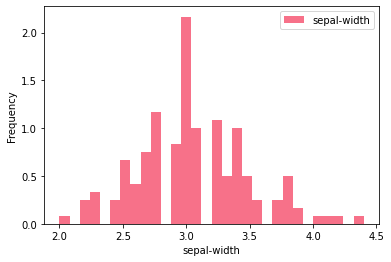

In [15]:
#PDF
dataset.plot(y='sepal-width', kind='hist',legend='True', bins=30,density=True)
plt.xlabel('sepal-width')
plt.show()

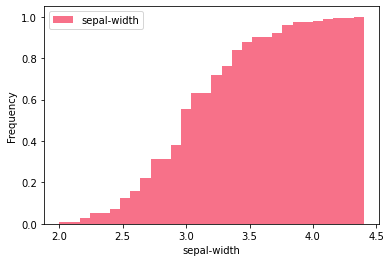

In [16]:
#CDF
dataset.plot(y='sepal-width', kind='hist',legend='True', bins=30,density=True, cumulative=True)
plt.xlabel('sepal-width')
plt.show()

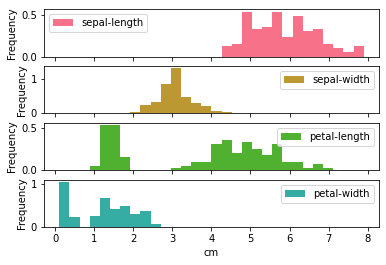

In [17]:
#PDF: Check the kind of distributions.
#It looks like perhaps two of the input variables have a Gaussian distribution. 
#This is useful to note as we can use algorithms 
#that can exploit this assumption.
dataset.plot(kind='hist',legend='True', bins=30,density=True, subplots=True)
plt.xlabel('cm')
plt.show()

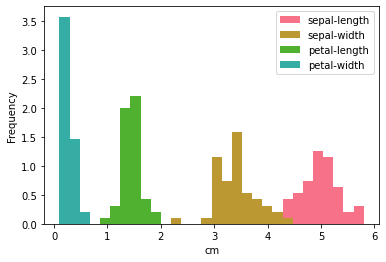

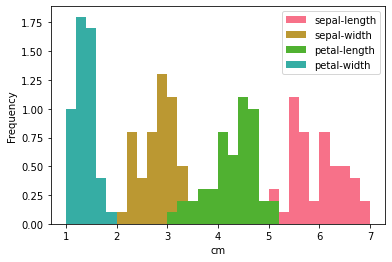

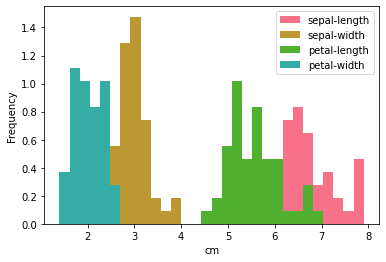

In [18]:
#wrt each class
indices_1=dataset['class']=='Iris-setosa'
setosa=dataset.loc[indices_1,:]
setosa.plot(kind='hist',legend='True', bins=30,density=True)
plt.xlabel('cm')
plt.show()

indices_2=dataset['class']=='Iris-versicolor'
versicolor=dataset.loc[indices_2,:]
versicolor.plot(kind='hist',legend='True', bins=30,density=True)
plt.xlabel('cm')
plt.show()

indices_3=dataset['class']=='Iris-virginica'
virginica=dataset.loc[indices_3,:]
virginica.plot(kind='hist',legend='True', bins=30,density=True)
plt.xlabel('cm')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbe28388ef0>,
      dtype=object)

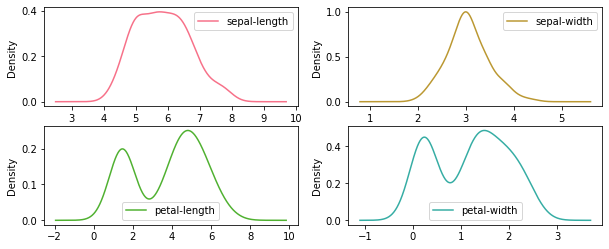

In [19]:
#Looking into the desity plot for a clearer understanding
dataset[numerical].plot(kind='density', subplots=True, layout=(2, 2), 
                  sharex=False, figsize=(10, 4), legend=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbe29f00be0>,
      dtype=object)

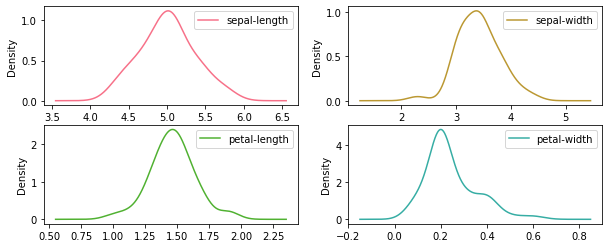

In [20]:
#Looking into the desity plot for a clearer understanding wrt class
setosa.plot(kind='density', subplots=True, layout=(2, 2), 
                  sharex=False, figsize=(10, 4), legend=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbe2860c780>,
      dtype=object)

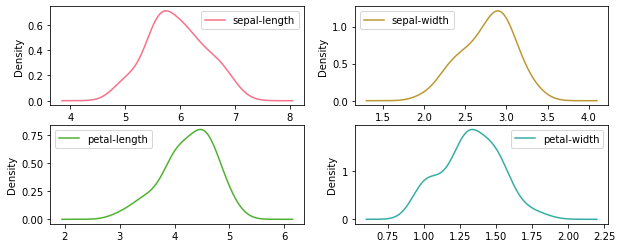

In [21]:
versicolor.plot(kind='density', subplots=True, layout=(2, 2), 
                  sharex=False, figsize=(10, 4), legend=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbe2807ba20>,
      dtype=object)

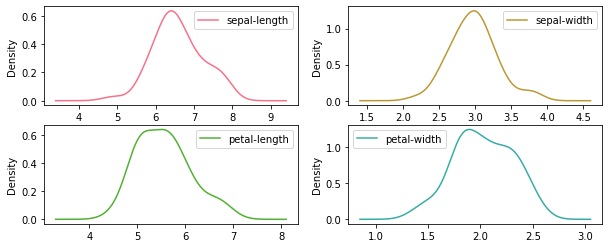

In [22]:
virginica.plot(kind='density', subplots=True, layout=(2, 2), 
                  sharex=False, figsize=(10, 4), legend=True)

After graphing the features in a pair plot, it is clear that the relationship between pairs of features of a iris-setosa is distinctly different from those of the other two species.
There is some overlap in the pairwise relationships of the other two species, iris-versicolor and iris-virginica.

4.  ***STATISTICAL EDA***



*   These uses the numerical values to analyse the statistical properties.
*   We can also have seperate statistical values wrt any group distribution within any feature.



In [23]:
#Summarizing
dataset.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


sepal-length    5.843333
sepal-width     3.054000
petal-length    3.758667
petal-width     1.198667
dtype: float64


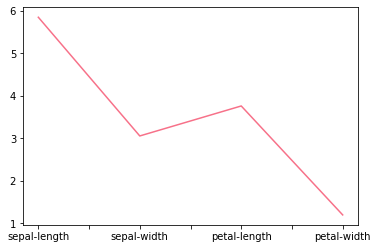

In [24]:
mean=dataset.mean()
print(mean)
mean.plot()

In [25]:
dataset['class'].describe()

count                 150
unique                  3
top       Iris-versicolor
freq                   50
Name: class, dtype: object

In [26]:
dataset['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [27]:
#wrt each class
setosa.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,50.00000,50.000000,50.000000,50.00000
mean,5.00600,3.418000,1.464000,0.24400
std,0.35249,0.381024,0.173511,0.10721
min,4.30000,2.300000,1.000000,0.10000
25%,4.80000,3.125000,1.400000,0.20000
50%,5.00000,3.400000,1.500000,0.20000
75%,5.20000,3.675000,1.575000,0.30000
max,5.80000,4.400000,1.900000,0.60000


In [28]:
versicolor.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,50.000000,50.000000,50.000000,50.000000
mean,5.936000,2.770000,4.260000,1.326000
std,0.516171,0.313798,0.469911,0.197753
min,4.900000,2.000000,3.000000,1.000000
25%,5.600000,2.525000,4.000000,1.200000
50%,5.900000,2.800000,4.350000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,7.000000,3.400000,5.100000,1.800000


In [29]:
virginica.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,50.00000,50.000000,50.000000,50.00000
mean,6.58800,2.974000,5.552000,2.02600
std,0.63588,0.322497,0.551895,0.27465
min,4.90000,2.200000,4.500000,1.40000
25%,6.22500,2.800000,5.100000,1.80000
50%,6.50000,3.000000,5.550000,2.00000
75%,6.90000,3.175000,5.875000,2.30000
max,7.90000,3.800000,6.900000,2.50000


In [30]:
# Now how to get correlation between variables
dataset[dataset.columns].corr()

,sepal-length,sepal-width,petal-length,petal-width
sepal-length,1.000000,-0.109369,0.871754,0.817954
sepal-width,-0.109369,1.000000,-0.420516,-0.356544
petal-length,0.871754,-0.420516,1.000000,0.962757
petal-width,0.817954,-0.356544,0.962757,1.000000


5.  ***MODELING AND PREDICTION***

In [31]:
X=dataset[numerical]
Y=dataset[target]

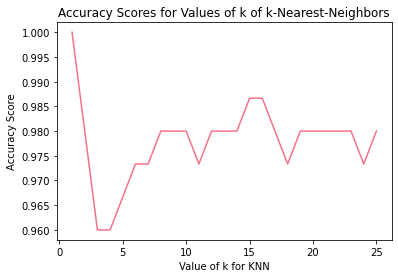

In [32]:
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, Y.values.ravel())    #.values will give the values in an array. (shape: (n,1) .ravel will convert that array shape to (n, )
    y_pred = knn.predict(X)
    scores.append(metrics.accuracy_score(Y, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

6.  ***TEST AND TRAIN***

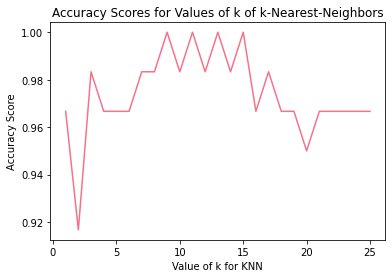

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=5)
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train.values.ravel())
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

7. ***COMPARATIVE STUDY***

In [34]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train.values.ravel())
y_pred = logreg.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9833333333333333


In [35]:
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [37]:
# we will evaluate using  6 different algorithms.
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=7)#here e use kfold validation for scoring
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')#apply dataset on train data
    results.append(cv_results)
    names.append(name)
    #here we are using supervised method as we are giving what could be the result to given characteristics
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    #here we can see  KNN has the largest estimated accuracy score.

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number

LR: 0.955556 (0.054433)
LDA: 0.977778 (0.044444)
KNN: 0.944444 (0.055556)
CART: 0.944444 (0.055556)
NB: 0.944444 (0.074536)
SVM: 0.955556 (0.054433)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example us

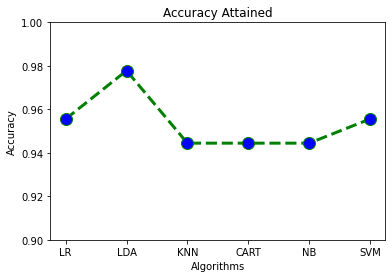

In [55]:
#Visually comparing these algorithms using 10 fold CV
res=[0.955556, 0.977778, 0.944444, 0.944444, 0.944444, 0.955556]
# plotting the points  
plt.plot(names, res, color='green', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=12) 

plt.ylim(0.9,1)
# naming the x axis 
plt.xlabel('Algorithms') 
# naming the y axis 
plt.ylabel('Accuracy') 
  
# giving a title to my graph 
plt.title('Accuracy Attained') 
  
# function to show the plot 
plt.show()

8.  ***MAKING PREDICTIONS***



*   Analysing the Prediction report using one of the algorithms.
*   Since KNN gives good results in case of clusters we have the following prediction and classification report.



In [56]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.9666666666666667
[[20  0  0]
 [ 0 21  0]
 [ 0  2 17]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        20
Iris-versicolor       0.91      1.00      0.95        21
 Iris-virginica       1.00      0.89      0.94        19

       accuracy                           0.97        60
      macro avg       0.97      0.96      0.97        60
   weighted avg       0.97      0.97      0.97        60



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
